In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import reuters
from tensorflow.keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# Build Model

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# Train the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7982/7982 [==============================] - 1s 152us/sample - loss: 2.8769 - acc: 0.5306 - val_loss: 1.8930 - val_acc: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 94us/sample - loss: 1.4975 - acc: 0.7022 - val_loss: 1.3443 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 91us/sample - loss: 1.0588 - acc: 0.7736 - val_loss: 1.1468 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 101us/sample - loss: 0.8261 - acc: 0.8272 - val_loss: 1.0642 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 95us/sample - loss: 0.6559 - acc: 0.8681 - val_loss: 0.9792 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 93us/sample - loss: 0.5255 - acc: 0.8930 - val_loss: 0.9369 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 91us/sample - loss: 0

In [11]:
# Plot

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

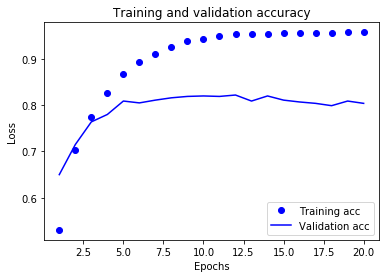

In [12]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# New Model

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 120us/sample - loss: 2.5248 - acc: 0.4632 - val_loss: 1.6935 - val_acc: 0.6190
Epoch 2/9
7982/7982 [==============================] - 1s 91us/sample - loss: 1.4159 - acc: 0.7016 - val_loss: 1.2878 - val_acc: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s 92us/sample - loss: 1.0556 - acc: 0.7771 - val_loss: 1.1281 - val_acc: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 93us/sample - loss: 0.8285 - acc: 0.8290 - val_loss: 1.0240 - val_acc: 0.7910
Epoch 5/9
7982/7982 [==============================] - 1s 91us/sample - loss: 0.6582 - acc: 0.8638 - val_loss: 0.9624 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 93us/sample - loss: 0.5326 - acc: 0.8915 - val_loss: 0.9158 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 1s 94us/sample - loss: 0.4256 - acc: 0.9136 - val_loss: 0.9128 - val_acc: 0.8080

In [17]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 95us/sample - loss: 0.9808 - acc: 0.7872


In [18]:
results

[0.9807755467303608, 0.7871772]